# Multi-modal vector embeddings

A vector embedding can also represent non-textual data, such as images.

In [8]:
import os
import mimetypes

import requests
from PIL import Image
import dotenv
from azure.identity import DefaultAzureCredential, get_bearer_token_provider

dotenv.load_dotenv()

azure_credential = DefaultAzureCredential(exclude_shared_token_cache_credential=True)

token_provider = get_bearer_token_provider(azure_credential, "https://cognitiveservices.azure.com/.default")
AZURE_COMPUTERVISION_SERVICE = os.getenv("AZURE_COMPUTERVISION_SERVICE")
AZURE_COMPUTER_VISION_URL = f"https://{AZURE_COMPUTERVISION_SERVICE}.cognitiveservices.azure.com/computervision/retrieval"

def get_model_params():
    return {"api-version": "2023-02-01-preview", "modelVersion": "latest"}

def get_auth_headers():
    return {"Authorization": "Bearer " + token_provider()}

def get_image_embedding(image_file):
    mimetype = mimetypes.guess_type(image_file)[0]
    url = f"{AZURE_COMPUTER_VISION_URL}:vectorizeImage"
    headers = get_auth_headers()
    headers["Content-Type"] = mimetype
    response = requests.post(url, headers=headers, params=get_model_params(), data=open(image_file, "rb"))
    if response.status_code != 200:
        print(image_file, response.status_code, response.json())
    return response.json()["vector"]

def get_text_embedding(text):
    url = f"{AZURE_COMPUTER_VISION_URL}:vectorizeText"
    return requests.post(url, headers=get_auth_headers(), params=get_model_params(),
                         json={"text": text}).json()["vector"]


In [ ]:
import json

vectors = {}
for image_file in os.listdir("product_images"):
    image_embedding = get_image_embedding(f"product_images/{image_file}")
    vectors[image_file] = image_embedding

# save the vectors to a file
with open("vectors_images.json", "w") as f:
    json.dump(vectors, f)
    

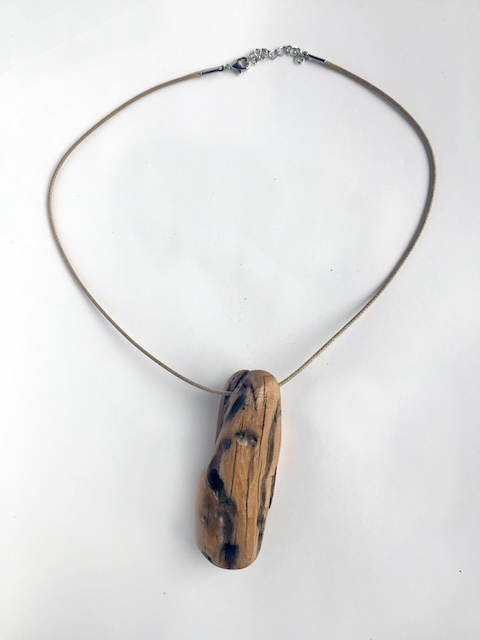

In [10]:
Image.open("product_images/amulet8_fullshot.jpg")

In [11]:
vectors["amulet8_fullshot.jpg"]

[3.5,
 -1.9355469,
 1.6025391,
 -0.59765625,
 -0.96484375,
 -0.8457031,
 -2.9472656,
 -4.1992188,
 1.1591797,
 -0.89208984,
 -0.62646484,
 4.5507812,
 0.2619629,
 2.0742188,
 1.4648438,
 -1.1044922,
 -0.7241211,
 -2.1289062,
 1.0966797,
 0.86816406,
 -0.7993164,
 -2.6484375,
 -1.1513672,
 2.9511719,
 -0.87841797,
 0.43676758,
 1.8681641,
 0.89941406,
 1.671875,
 1.2011719,
 0.89453125,
 0.55029297,
 -1.0244141,
 3.4296875,
 0.77734375,
 -0.7001953,
 0.47583008,
 0.12683105,
 -0.18676758,
 0.18432617,
 -1.1416016,
 1.1347656,
 -3.0058594,
 3.5957031,
 3.3457031,
 -1.8164062,
 -0.7338867,
 -0.5019531,
 1.0996094,
 -2.5410156,
 -2.0800781,
 1.2949219,
 -2.5429688,
 -0.9711914,
 0.7548828,
 0.85253906,
 -0.3720703,
 -1.3173828,
 -1.0869141,
 0.51220703,
 -1.3515625,
 -0.4140625,
 3.3125,
 1.1269531,
 3.6582031,
 -0.5317383,
 2.1347656,
 2.1210938,
 1.8681641,
 -0.0881958,
 -2.7324219,
 -2.0195312,
 -1.8193359,
 -0.1887207,
 0.5878906,
 2.0234375,
 -3.4589844,
 1.2265625,
 0.109375,
 4.2968

In [12]:
len(vectors["amulet8_fullshot.jpg"])

1024

In [13]:
import csv

# Open most-common-nouns-english.csv and read the first column as words
words = []
with open('most-common-nouns-english.csv') as f:
    reader = csv.reader(f)
    next(reader)
    for row in reader:
        words.append(row[0])

# Calculate embeddings for all words
word_vectors = {}
for word in words:
    word_embedding = get_text_embedding(word)
    word_vectors[word] = word_embedding

# Save embeddings to a file
with open('vectors_multimodal_words.json', 'w') as f:
    json.dump(word_vectors, f)

In [14]:
word_vectors["time"]

[0.011690983,
 -0.009620458,
 0.017175259,
 -0.017673155,
 -0.009046124,
 0.0028188203,
 0.011545039,
 -0.014368198,
 0.014442478,
 0.014623431,
 0.015065165,
 0.00042011213,
 -0.0014555957,
 -0.016261779,
 -0.011267354,
 -0.000994232,
 0.004056177,
 0.0064508123,
 0.0017096518,
 -0.022140384,
 -0.0042338367,
 -0.032341678,
 -0.016602129,
 0.015100859,
 -0.0068019982,
 -0.015637828,
 0.009376598,
 0.016046988,
 -0.025700444,
 0.006173764,
 -0.00080972497,
 0.005256378,
 0.024644634,
 0.0027394234,
 0.001969148,
 -0.011291228,
 3.3870103e-05,
 0.01274082,
 -0.016525341,
 0.010700018,
 0.0019341275,
 0.0066786567,
 0.003057214,
 -0.014592948,
 0.0022541722,
 -0.0014702374,
 0.019207258,
 0.0046008555,
 0.023107762,
 0.0034661116,
 -0.034713883,
 -0.0069477092,
 0.020136578,
 -0.0055147754,
 -0.0029195163,
 0.00891475,
 -0.00072945794,
 0.017023377,
 0.03231718,
 -0.009348661,
 0.024243753,
 -0.015751058,
 0.01733636,
 0.025417704,
 0.0004455474,
 -0.024058154,
 0.003977032,
 0.019410236,

In [15]:
len(word_vectors["time"])

1024